In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path = 'C:\\Users\\m_rod\\Documents\\Data Analyst\\Projects\\01 - Explore Weather Trends\\Data\\'

In [4]:
def load_data(data_path, file_name):
    return pd.read_csv(data_path + file_name)

In [6]:
global_weather = load_data(data_path, 'global_data_results.csv')
miami_weather = load_data(data_path, 'miami_city_data.csv')

In [7]:
global_weather.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [8]:
global_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [9]:
global_weather.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


In [10]:
miami_weather.head()

,year,city,country,avg_temp
0,1758,Miami,United States,23.05
1,1759,Miami,United States,22.56
2,1760,Miami,United States,15.14
3,1761,Miami,United States,NaN
4,1762,Miami,United States,NaN


In [11]:
miami_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 4 columns):
year        256 non-null int64
city        256 non-null object
country     256 non-null object
avg_temp    244 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ KB


In [12]:
miami_weather.describe()

,year,avg_temp
count,256.000000,244.000000
mean,1885.500000,23.040697
std,74.045031,0.768276
min,1758.000000,15.140000
25%,1821.750000,22.750000
50%,1885.500000,23.060000
75%,1949.250000,23.412500
max,2013.000000,24.520000


In [13]:
avg_value = miami_weather['avg_temp'].mean()

In [14]:
miami_weather['avg_temp'].fillna(value=avg_value, inplace=True)

In [15]:
miami_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 4 columns):
year        256 non-null int64
city        256 non-null object
country     256 non-null object
avg_temp    256 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ KB


In [16]:
# Moving Average
global_weather['10years_MA'] = global_weather['avg_temp'].rolling(10).mean()
miami_weather['10years_MA'] = miami_weather['avg_temp'].rolling(10).mean()

In [17]:
miami_weather.head(15)

,year,city,country,avg_temp,10years_MA
0,1758,Miami,United States,23.050000,NaN
1,1759,Miami,United States,22.560000,NaN
2,1760,Miami,United States,15.140000,NaN
3,1761,Miami,United States,23.040697,NaN
4,1762,Miami,United States,23.040697,NaN
5,1763,Miami,United States,23.040697,NaN
6,1764,Miami,United States,23.040697,NaN
7,1765,Miami,United States,23.040697,NaN
8,1766,Miami,United States,23.040697,NaN
9,1767,Miami,United States,23.040697,22.203488


In [18]:
global_weather.head(15)

,year,avg_temp,10years_MA
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,8.030


# Visualization

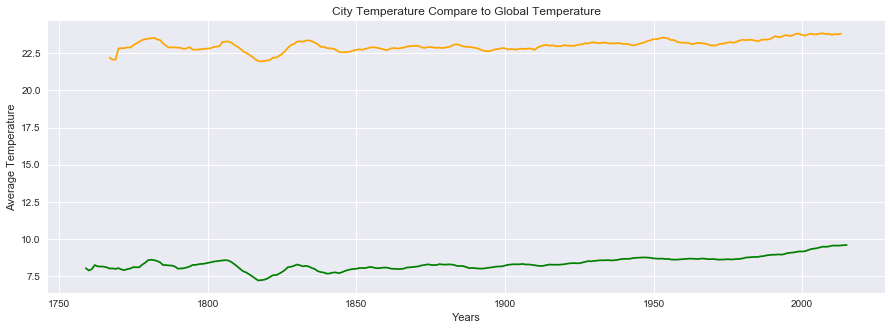

In [21]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15,5)})
plt.plot(global_weather['year'], global_weather['10years_MA'], color='g')
plt.plot(miami_weather['year'], miami_weather['10years_MA'], color='orange')
plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.title('City Temperature Compare to Global Temperature')
plt.show()

# Observations